In [1]:
import pandas as pd
import os
from common import collect_results
from pathlib import Path
from matplotlib import pyplot as plt

In [2]:
ROOT = Path("./scalability")
OUTPUT_DIR = os.path.join(os.path.abspath(os.curdir) , "output")
print(OUTPUT_DIR)


def get_matcher(prefix):
    def matcher(p: Path):
        import re
        pattern = re.compile(prefix + r"-regions(\d+)-hot(\d+)-(\w)-mr(\d+)-([\d-]+)")
        match = pattern.match(p.name)
        if not match:
            return None

        print("Found result:", p.name)
        hot = int(match.group(2))
        return {
            "regions": int(match.group(1)),
            "hot": 1000000 if hot == 0 else hot,
            "workload": str(match.group(3)),
            "mr": int(match.group(4)),
            "suffix": str(match.group(5)),
        }
    
    return matcher

/Users/poojanilangekar/sunstorm-analysis/output


In [3]:
RENEW_CACHE = False

sunstorm_matcher = get_matcher("scalability-sunstorm")
sunstorm_throughput_df = collect_results(
    ROOT / "sunstorm",
    sunstorm_matcher,
    RENEW_CACHE,
)
sunstorm_throughput_df["system"] = "sunstorm"

aurora_matcher = get_matcher("scalability-aurora")
aurora_throughput_df = collect_results(
    ROOT / "aurora",
    aurora_matcher,
    RENEW_CACHE,
)
aurora_throughput_df["system"] = "aurora"

yugabyte_matcher = get_matcher("scalability-yugabyte")
yugabyte_throughput_df = collect_results(
    ROOT / "yugabyte",
    yugabyte_matcher,
    RENEW_CACHE,
)
yugabyte_throughput_df["system"] = "yugabyte"


cockroach_matcher = get_matcher("scalability-cockroach")
cockroach_throughput_df = collect_results(
    ROOT / "cockroach",
    cockroach_matcher,
    RENEW_CACHE,
)
cockroach_throughput_df["system"] = "cockroach"


In [4]:
throughput_df = pd.concat([
    sunstorm_throughput_df,
    aurora_throughput_df,
    yugabyte_throughput_df,
    cockroach_throughput_df,
])
throughput_df

,path,region,regions,hot,workload,mr,suffix,rejected,rejected.WorkloadF1,rejected.WorkloadF2,...,p0.WorkloadF6,p25.WorkloadF6,p50.WorkloadF6,p75.WorkloadF6,p90.WorkloadF6,p95.WorkloadF6,p99.WorkloadF6,p100.WorkloadF6,throughput.WorkloadF6,system
0,scalability/sunstorm/scalability-sunstorm-regi...,4-us-west-1-0,5,1000000,F,5,20250108-135700,4255,2912,1004.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sunstorm
1,scalability/sunstorm/scalability-sunstorm-regi...,1-us-east-1-0,5,1000000,F,5,20250108-135700,4423,3054,1041.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sunstorm
2,scalability/sunstorm/scalability-sunstorm-regi...,5-ap-southeast-1-0,5,1000000,F,5,20250108-135700,4749,3170,1230.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sunstorm
3,scalability/sunstorm/scalability-sunstorm-regi...,3-ap-northeast-1-0,5,1000000,F,5,20250108-135700,4536,3070,1128.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sunstorm
4,scalability/sunstorm/scalability-sunstorm-regi...,2-eu-west-1-0,5,1000000,F,5,20250108-135700,4336,2914,1062.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sunstorm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,scalability/cockroach/scalability-cockroach-re...,4-us-west-1-0,6,1000000,F,5,20250115-110120,35,13,15.0,...,801.788,1381.98450,1634.8110,1901.98550,2129.4682,2206.02410,2297.59474,2332.073,1.0,cockroach
68,scalability/cockroach/scalability-cockroach-re...,1-us-east-1-0,6,1000000,F,5,20250115-110120,34,9,18.0,...,660.381,1227.46150,1479.3550,1871.67100,2056.3430,2176.15300,2406.96760,2434.108,0.8,cockroach
69,scalability/cockroach/scalability-cockroach-re...,5-ap-southeast-1-0,6,1000000,F,5,20250115-110120,47,12,25.0,...,1461.025,1895.23525,2054.8000,2344.34725,2683.1104,2739.69205,2816.57097,2818.587,0.8,cockroach
70,scalability/cockroach/scalability-cockroach-re...,3-ap-northeast-1-0,6,1000000,F,5,20250115-110120,45,10,26.0,...,1167.299,1655.60050,1995.6675,2233.29200,2522.4910,2646.76100,2755.97025,2857.237,0.8,cockroach


In [5]:
throughput_df[["system", "regions", "hot", "throughput", "mr"]].groupby(["system", "regions", "hot", "mr"]).sum()

throughput
system   regions hot     mr              
aurora   3       10000   0    6743.106702
                         5    6860.563768
                 1000000 0    6890.915671
                         5    6886.653207
         4       10000   0    5889.045129
...                                   ...
yugabyte 5       1000000 5    9115.679448
         6       10000   0   12652.513398
                         5   10720.167533
                 1000000 0   13040.249460
                         5   11097.640073

[63 rows x 1 columns]

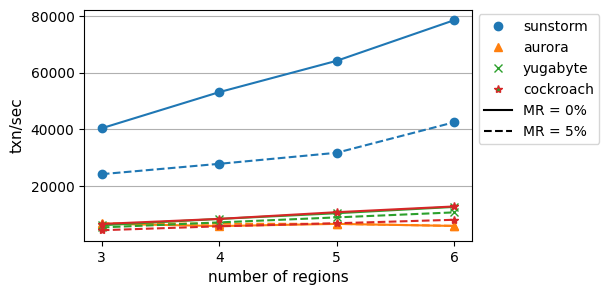

In [6]:
from matplotlib.lines import Line2D

FONT_SIZE_AXES = 11
FONT_SIZE_LEGEND = 11

# for hot in [1000000, 10000]:
for hot in [10000]:
    hot_df = throughput_df[throughput_df.hot == hot]
    hot_label = hot
    ax = hot_df.pivot_table(
        index=["regions"], columns=["system", "mr"], values="throughput", aggfunc="sum"
    )[[
        ("sunstorm", 0),
        ("sunstorm", 5),
        ("aurora", 0),
        ("aurora", 5),
        ("yugabyte", 0),
        ("yugabyte", 5),
        ("cockroach", 0),
        ("cockroach", 5),
    ]].plot(
        xlabel="number of regions",
        ylabel=" txn/sec",
        figsize=(5, 3),
        rot=0,
        # logy=True,
        style={
            ("sunstorm", 0): "o-C0",
            ("sunstorm", 5): "o--C0",
            ("aurora", 0): "^-C1",
            ("aurora", 5): "^--C1",
            ("yugabyte", 0): "x-C2",
            ("yugabyte", 5): "x--C2",
            ("cockroach", 0): "*-C3",
            ("cockroach", 5): "*--C3",
        },
        xticks=range(3, 7),
    )
    ax.set_xlabel("number of regions", fontsize=FONT_SIZE_AXES)
    ax.set_ylabel("txn/sec", fontsize=FONT_SIZE_AXES)
    # ax.margins(y=0.2)
    ax.grid(axis="y")

    legend_elements = [
        Line2D([0], [0], lw=0, marker='o', color='C0', markerfacecolor='C0', label='sunstorm'),
        Line2D([0], [0], lw=0, marker='^', color='C1', markerfacecolor='C1', label='aurora'),
        Line2D([0], [0], lw=0, marker='x', color='C2', markerfacecolor='C2', label='yugabyte'),
        Line2D([0], [0], lw=0, marker='*', color='C3', markerfacecolor='C2', label='cockroach'),
        Line2D([0], [0], color='k', linestyle='-', label='MR = 0%'),
        Line2D([0], [0], color='k', linestyle='--', label='MR = 5%'),
    ]

    plt.legend(
        handles=legend_elements, 
        title="",
        ncol=1,
        bbox_to_anchor=(1, 1.01),
        loc="upper left",
    )
    plt.savefig("scalability-hot10000.pdf", bbox_inches="tight")